In [1]:
#imports

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import png

%matplotlib inline

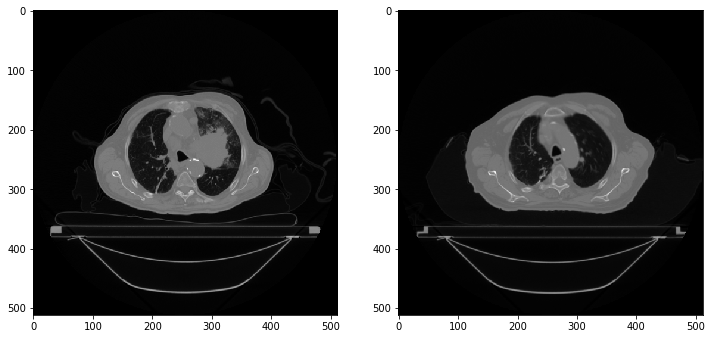

<Figure size 432x288 with 0 Axes>

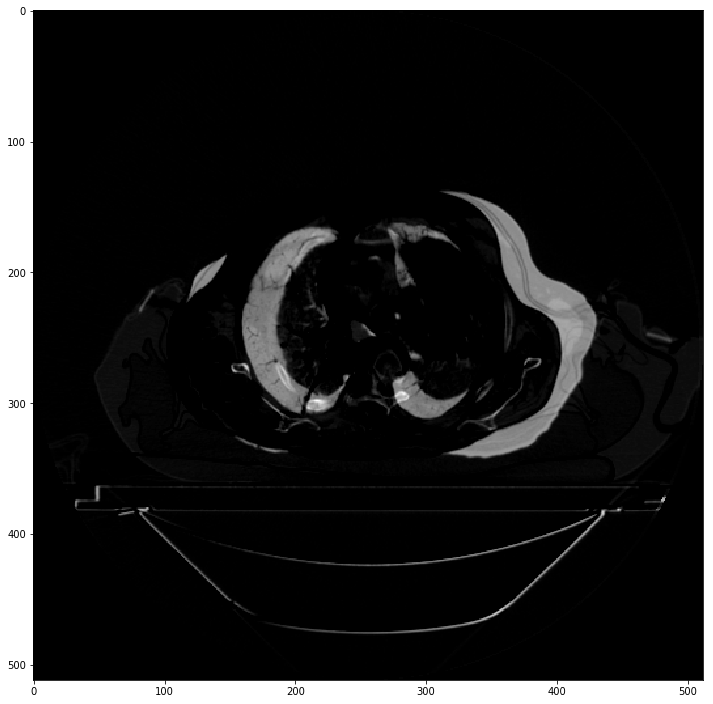

120 117 0


<Figure size 432x288 with 0 Axes>

In [2]:
source_dir = r'Pre-png'

list_of_files = os.listdir(source_dir)

img_array = []
png = []

ref = cv2.imread('Post-png/595.png',0)

for file in list_of_files:
    f = os.path.join(source_dir,file)
    img_array.append(file)
    png.append(cv2.imread(f,0))
    
min = 1E32
    
for i in png:
    #print(np.max(i),np.max(ref))
    diff = np.sum(cv2.subtract(i,ref)*cv2.subtract(ref,i))
    if diff < min:
        min = diff
        file_min = i
    #print(diff)
    
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(ref, cmap='gray')
plt.subplot(122)
plt.imshow(file_min, cmap='gray')
plt.show()
plt.savefig("min-diff.pdf")
plt.figure(figsize=(12,20))
plt.subplot(111)
# notice that numpy subtract causes the integer overflow!, use cv2!
result = cv2.subtract(file_min,ref)
plt.imshow(result, cmap='gray')
plt.show()
plt.savefig("diff.pdf")

print(ref[300,150],file_min[300,150],result[300,150])